In [52]:
import matplotlib as matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'

In [54]:
data = np.load('proyecto_training_data.npy')
print(data)
print(data.shape)
print(data.ndim)
print(data.dtype)
print(data.size)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]
(1460, 6)
2
float64
8760


In [55]:
df = pd.DataFrame(data, columns=['salePrice', 'overallQual', '1stFlrSf', 'totRmsAbvGrd', 'yearBuilt', 'lotFrontage'])
print(df)

      salePrice  overallQual  1stFlrSf  totRmsAbvGrd  yearBuilt  lotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


In [56]:
df.describe()

,salePrice,overallQual,1stFlrSf,totRmsAbvGrd,yearBuilt,lotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


Text(0.5, 1.0, 'Null values')

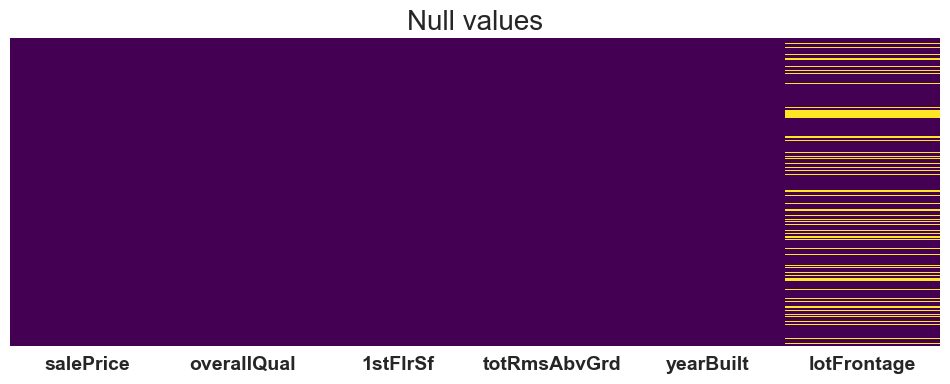

In [69]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Null values')

In [58]:
df.isna().sum()

salePrice         0
overallQual       0
1stFlrSf          0
totRmsAbvGrd      0
yearBuilt         0
lotFrontage     259
dtype: int64

<AxesSubplot: >

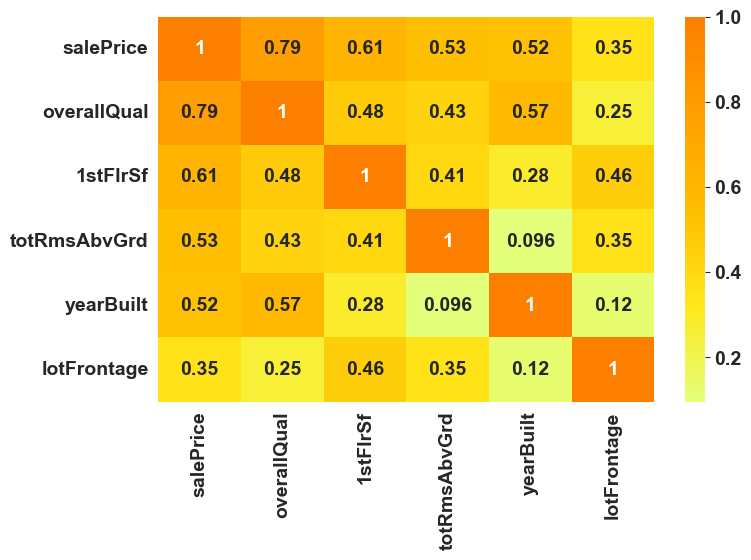

In [59]:
corr = df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)

Text(0.5, 1.0, 'Saleprice vs Overall Quality')

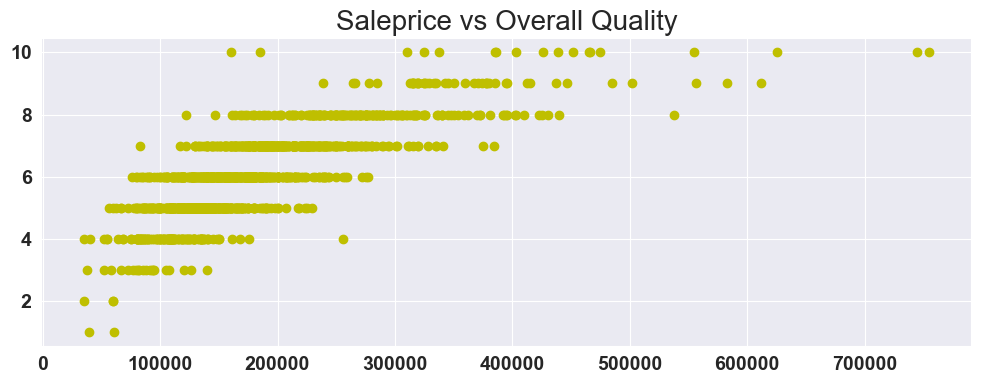

In [68]:
#sns.scatterplot(data=df, x='salePrice', y='overallQual').set(title='saleprice vs overallQual')
plt.figure(figsize=(12,4))
plt.scatter(x='salePrice',y='overallQual', c='y', data=df )
plt.title('Saleprice vs Overall Quality')

Text(0.5, 1.0, 'Saleprice vs 1stFlrSf')

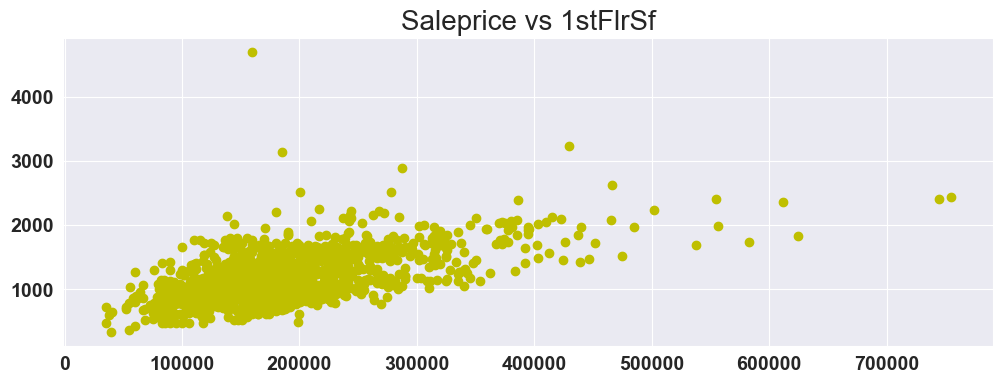

In [70]:
#sns.scatterplot(data=df, x='salePrice', y='1stFlrSf').set(title='saleprice vs 1stFlrSf')
plt.figure(figsize=(12,4))
plt.scatter(x='salePrice',y='1stFlrSf', c='y', data=df )
plt.title('Saleprice vs 1stFlrSf')

Text(0.5, 1.0, 'Saleprice vs totRmsAbvGrd')

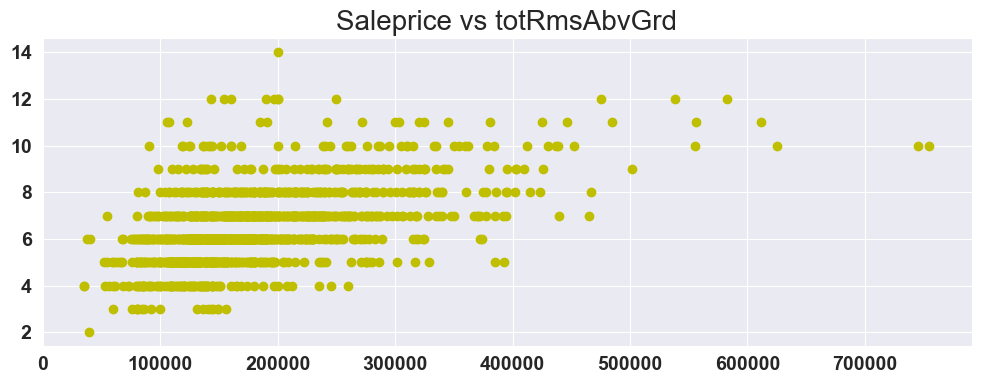

In [71]:
#sns.scatterplot(data=df, x='salePrice', y='totRmsAbvGrd').set(title='saleprice vs totRmsAbvGrd')
plt.figure(figsize=(12,4))
plt.scatter(x='salePrice',y='totRmsAbvGrd', c='y', data=df )
plt.title('Saleprice vs totRmsAbvGrd')

Text(0.5, 1.0, 'Saleprice vs yearBuilt')

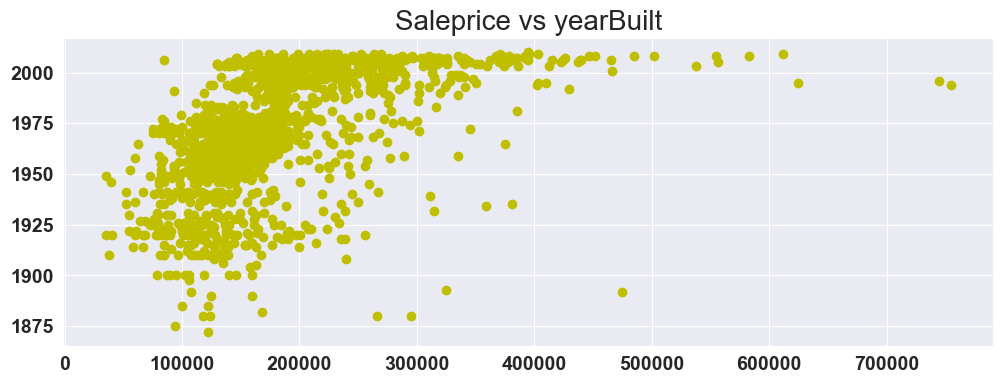

In [73]:
#sns.scatterplot(data=df, x='salePrice', y='yearBuilt').set(title='saleprice vs yearBuilt')
plt.figure(figsize=(12,4))
plt.scatter(x='salePrice',y='yearBuilt', c='y', data=df )
plt.title('Saleprice vs yearBuilt')

Text(0.5, 1.0, 'Saleprice vs lotFrontage')

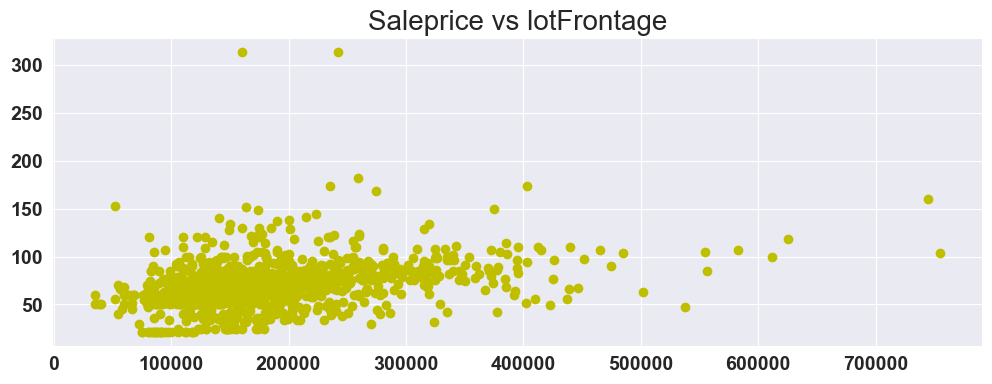

In [74]:
#sns.scatterplot(data=df, x='salePrice', y='lotFrontage').set(title='saleprice vs lotFrontage')
plt.figure(figsize=(12,4))
plt.scatter(x='salePrice',y='lotFrontage', c='y', data=df )
plt.title('Saleprice vs lotFrontage')

Index(['salePrice', 'overallQual', '1stFlrSf', 'totRmsAbvGrd', 'yearBuilt',
       'lotFrontage'],
      dtype='object')


<Figure size 800x500 with 0 Axes>

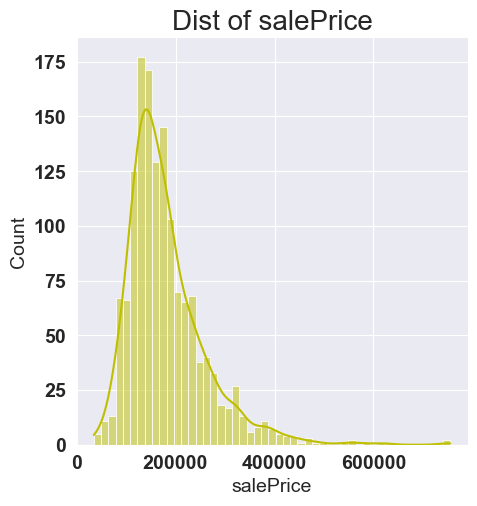

<Figure size 800x500 with 0 Axes>

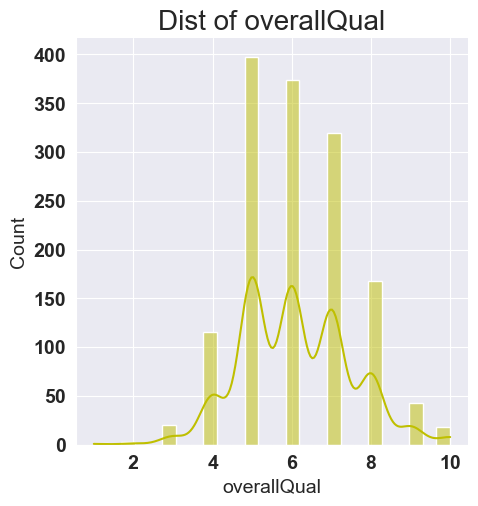

<Figure size 800x500 with 0 Axes>

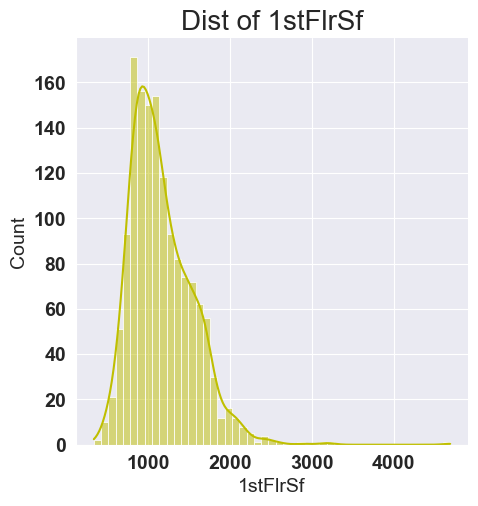

<Figure size 800x500 with 0 Axes>

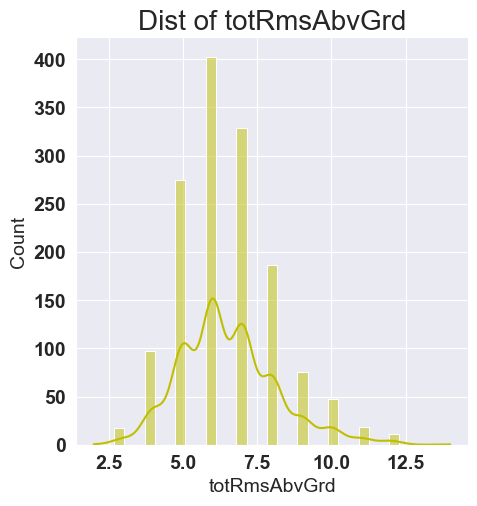

<Figure size 800x500 with 0 Axes>

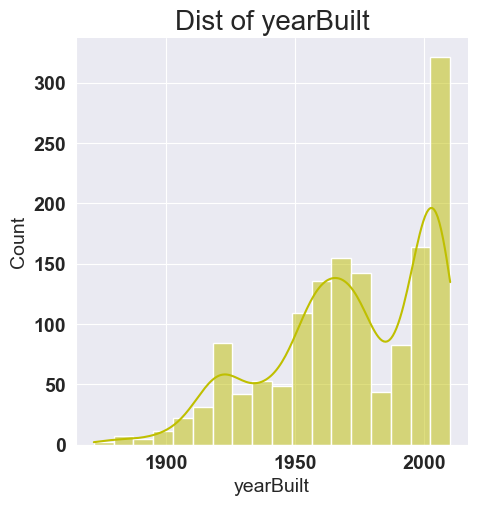

<Figure size 800x500 with 0 Axes>

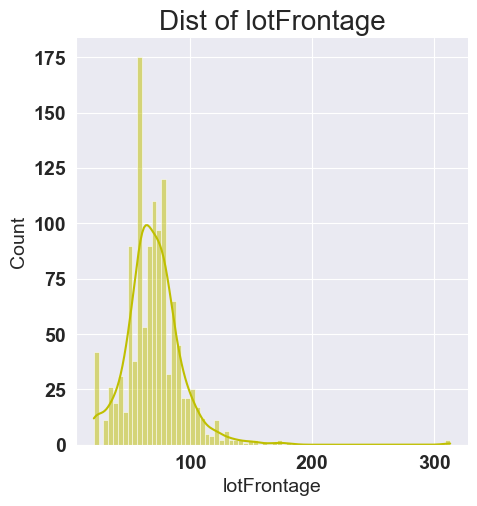

In [81]:
#figure = plt.figure(figsize=(12,4))
print(df.columns)
#params = {'axes.titlesize':'20'}
#matplotlib.rcParams.update(params)
#df.hist(figsize=(100,100),color='r', bins=20, xlabelsize=70, ylabelsize=100)
for column in df.columns:
    plt.figure()
    sns.displot(data=df[column], kde=True, color='y')
    plt.title('Dist of '+column)
